In [2]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from matplotlib.patches import Ellipse
from scipy.stats import chi2

In [3]:
fpath = "/nfs/turbo/umms-indikar/shared/projects/RECODE/YvsO_results/deseq_output/pcaData_All.csv"

df = pd.read_csv(fpath)

df['Sample'] = df['Condition'] + " " + df['Time']
df = df.sort_values(by='Batch')

print(f"{df.shape=}")
df.head()

df.shape=(13, 9)


,Unnamed: 0,PC1,PC2,group,Condition,Time,Batch,name,Sample
0,bc1_3,-11.408024,-5.525350,Young:D28:batch1,Young,D28,batch1,bc1_3,Young D28
7,bc4,-10.039831,9.686509,Young:D14:batch2,Young,D14,batch2,bc4,Young D14
8,bc5,-8.726958,8.501406,Young:D14:batch2,Young,D14,batch2,bc5,Young D14
9,bc6,13.468020,5.686194,OA:D14:batch2,OA,D14,batch2,bc6,OA D14
10,bc7,11.446511,8.379033,OA:D14:batch2,OA,D14,batch2,bc7,OA D14


In [4]:
def draw_ellipses(ax, df, samples, alpha, edgecolor, facecolor, ls, lw):
    for sample in samples:
        sample_data = df[df['Sample'] == sample]
        mean = sample_data[['PC1', 'PC2']].mean().values
        cov = np.cov(sample_data[['PC1', 'PC2']].values, rowvar=False)
        
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        chi2_val = chi2.ppf(0.95, df=2)
        width, height = 2 * np.sqrt(eigenvalues * chi2_val)
        
        angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
        
        ellipse = Ellipse(mean, width, height, angle=angle, alpha=alpha, edgecolor=edgecolor, facecolor=facecolor, ls=ls, lw=lw)#, fill=True)
        ax.add_patch(ellipse)

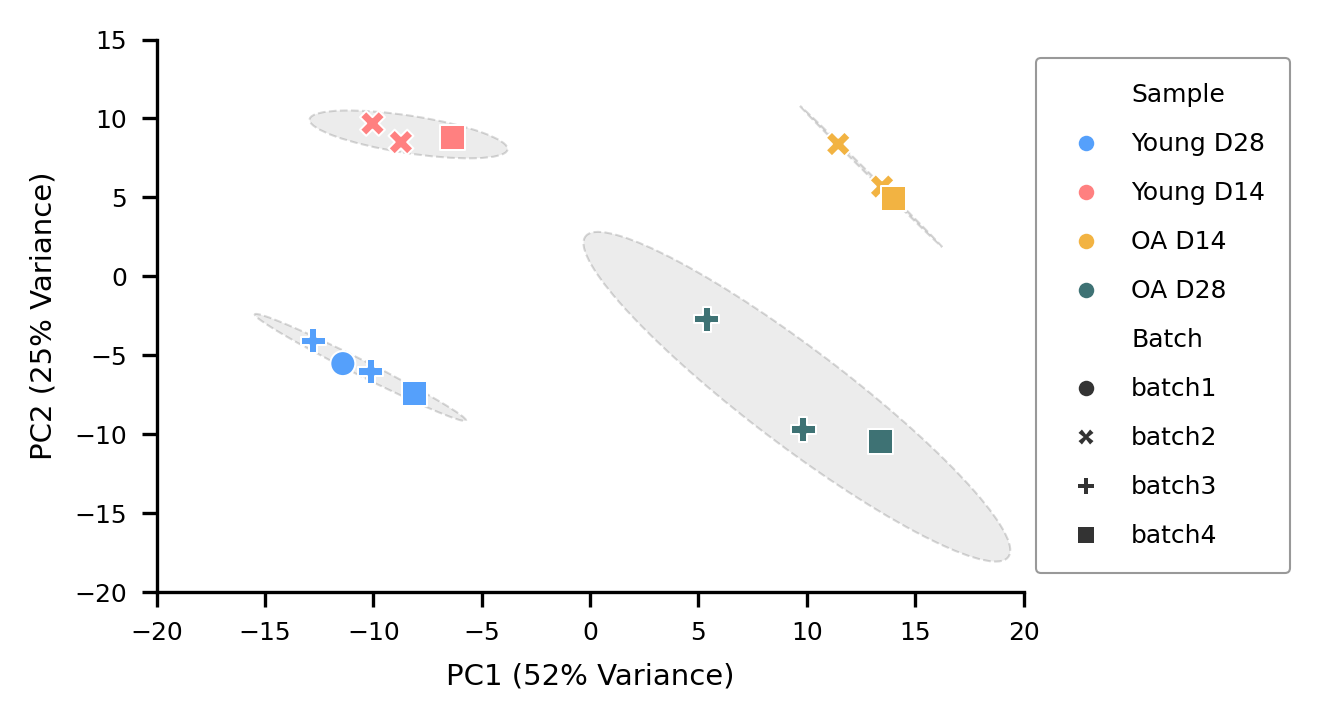

In [5]:
plt.rcParams['figure.figsize'] = 4.5, 2.5
plt.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots()

colors = {"Young D28" : "#55a0fb",
          "OA D28" : "#3e7274",
          "Young D14" : "#ff8080",
          "OA D14" : "#f2b342",
         }

markers = {"batch1" : "o",
           "batch2" : "X",
           "batch3" : "P",
           "batch4" : "s",
          }

samples = df['Sample'].unique()
draw_ellipses(ax, df, samples, alpha=0.15, edgecolor='k', facecolor='gray', ls='--', lw=0.5)

sns.scatterplot(df,
                x='PC1',
                y='PC2',
                hue='Sample',
                style='Batch',
                palette=colors,
                markers=markers,
                ax=ax,
               )

plt.xlabel("PC1 (52% Variance)", fontsize=7) # Values derived from R plots
plt.ylabel("PC2 (25% Variance)", fontsize=7) # Values derived from R plots
ax.tick_params(axis='both', labelsize=6)
ax.set_ylim([-20, 15])
ax.set_xlim([-20, 20])

# ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))

legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), edgecolor='gray',
                   fontsize=6, borderpad=1, labelspacing=1, markerscale=0.7)
legend.get_frame().set_linewidth(0.5)


sns.despine()
plt.tight_layout()